# Ahead Annual Average Daily Traffic in Los Angeles County in 2019

This data set looks into freeway car volume in California. It shows the location of the monitors, back and ahead peak hour, peak month and annual average daily traffic. "Back" represents traffic West of the count location and "ahead" represents traffic East of the count location.

**Step 1**: import libraries for data exploration

In [40]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

**Step 2**: import the data set which is going to be explored

In [41]:
traffic = gpd.read_file('Traffic_Volumes_AADT.zip')

**Step 3**: look at the general statistic of the data set

In [42]:
type(traffic)

geopandas.geodataframe.GeoDataFrame

In [43]:
traffic.head()

,OBJECTID_1,OBJECTID,District,Route,Rte_SFX,County,PM_PFX,Postmile,PM_SFX,Descriptn,...,Back_pk_m,Back_AADT,Ahead_pk_h,Ahead_pk_m,Ahead_AADT,Lon_S_or_W,Lat_S_or_W,Lon_N_or_E,Lat_N_or_E,geometry
0,1,1,1,1,None,MEN,None,0,None,SONOMA/MENDOCINO COUNTY LINE,...,None,None,440,4650,4000,-123.5185026,38.75984264,-123.5185026,38.75984264,"MULTIPOINT (-13750018.312 4687329.946, -137500..."
1,2,2,1,1,None,MEN,None,1.02,None,NORTH LIMITS GUALALA,...,4650,4000,370,3700,3100,-123.53189,38.77004592,-123.53189,38.77004592,"MULTIPOINT (-13751508.594 4688786.652, -137515..."
2,3,3,1,1,None,MEN,None,5.09,None,FISH ROCK ROAD,...,3600,3100,210,2600,3100,-123.585411,38.80354931,-123.585411,38.80354931,"MULTIPOINT (-13757466.525 4693571.340, -137574..."
3,4,4,1,1,None,MEN,None,14.692,None,"POINT ARENA, SOUTH CITY LIMITS",...,2600,2200,240,2850,2400,-123.6915134,38.90397338,-123.6915134,38.90397338,"MULTIPOINT (-13769277.789 4707926.608, -137692..."
4,5,5,1,1,None,MEN,None,15.18,None,"POINT ARENA, RIVERSIDE DRIVE",...,2800,2400,250,2800,2600,-123.6924099,38.91091252,-123.6924099,38.91091252,"MULTIPOINT (-13769377.594 4708919.284, -137693..."


In [44]:
traffic.tail()

,OBJECTID_1,OBJECTID,District,Route,Rte_SFX,County,PM_PFX,Postmile,PM_SFX,Descriptn,...,Back_pk_m,Back_AADT,Ahead_pk_h,Ahead_pk_m,Ahead_AADT,Lon_S_or_W,Lat_S_or_W,Lon_N_or_E,Lat_N_or_E,geometry
7115,7116,7116,12,605,None,ORA,None,3.092,None,"SEAL BEACH, JCT RTE 22",...,None,None,3250,47000,46100,-118.0914735,33.7786335,-118.0908233,33.77861286,"MULTIPOINT (-13145884.049 3999117.150, -131458..."
7116,7117,7117,12,605,None,ORA,R,0,None,JCT. RTE. 405,...,47000,44700,11700,172000,167500,-118.0917676,33.78441396,-118.09138,33.78396418,"MULTIPOINT (-13145916.788 3999891.340, -131458..."
7117,7118,7118,12,605,None,ORA,R,1.405,None,"LOS ALAMITOS, KATELLA AVENUE",...,169000,159800,14100,173000,167000,-118.0820302,33.80279867,-118.0817329,33.80281106,"MULTIPOINT (-13144832.828 4002353.991, -131448..."
7118,7119,7119,12,605,None,ORA,R,1.643,None,ORANGE/LOS ANGELES COUNTY LINE,...,177000,170000,None,None,None,-118.081547,33.80613969,-118.081287,33.8063525,"MULTIPOINT (-13144779.038 4002801.580, -131447..."
7119,7120,7120,3,99,None,SAC,R,24.352,None,BREAK IN ROUTE,...,None,None,None,None,None,-121.4736488,38.55883754,-121.4733879,38.55882168,"MULTIPOINT (-13522386.190 4658675.131, -135223..."


In [45]:
traffic.dtypes

OBJECTID_1       int64
OBJECTID         int64
District        object
Route           object
Rte_SFX         object
County          object
PM_PFX          object
Postmile        object
PM_SFX          object
Descriptn       object
Back_pk_h       object
Back_pk_m       object
Back_AADT       object
Ahead_pk_h      object
Ahead_pk_m      object
Ahead_AADT      object
Lon_S_or_W      object
Lat_S_or_W      object
Lon_N_or_E      object
Lat_N_or_E      object
geometry      geometry
dtype: object

In [46]:
traffic.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 7120 entries, 0 to 7119
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID_1  7120 non-null   int64   
 1   OBJECTID    7120 non-null   int64   
 2   District    7120 non-null   object  
 3   Route       7120 non-null   object  
 4   Rte_SFX     40 non-null     object  
 5   County      7120 non-null   object  
 6   PM_PFX      2370 non-null   object  
 7   Postmile    7120 non-null   object  
 8   PM_SFX      412 non-null    object  
 9   Descriptn   7119 non-null   object  
 10  Back_pk_h   6468 non-null   object  
 11  Back_pk_m   6468 non-null   object  
 12  Back_AADT   6472 non-null   object  
 13  Ahead_pk_h  6464 non-null   object  
 14  Ahead_pk_m  6464 non-null   object  
 15  Ahead_AADT  6464 non-null   object  
 16  Lon_S_or_W  7120 non-null   object  
 17  Lat_S_or_W  7120 non-null   object  
 18  Lon_N_or_E  7120 non-null   object  
 19

**Step 4**: trim the data set with desired columns

In [72]:
traffic[['Route','County','Descriptn','Back_AADT','Ahead_AADT','geometry']]

,Route,County,Descriptn,Back_AADT,Ahead_AADT,geometry
0,1,MEN,SONOMA/MENDOCINO COUNTY LINE,None,4000,"MULTIPOINT (-13750018.312 4687329.946, -137500..."
1,1,MEN,NORTH LIMITS GUALALA,4000,3100,"MULTIPOINT (-13751508.594 4688786.652, -137515..."
2,1,MEN,FISH ROCK ROAD,3100,3100,"MULTIPOINT (-13757466.525 4693571.340, -137574..."
3,1,MEN,"POINT ARENA, SOUTH CITY LIMITS",2200,2400,"MULTIPOINT (-13769277.789 4707926.608, -137692..."
4,1,MEN,"POINT ARENA, RIVERSIDE DRIVE",2400,2600,"MULTIPOINT (-13769377.594 4708919.284, -137693..."
...,...,...,...,...,...,...
7115,605,ORA,"SEAL BEACH, JCT RTE 22",None,46100,"MULTIPOINT (-13145884.049 3999117.150, -131458..."
7116,605,ORA,JCT. RTE. 405,44700,167500,"MULTIPOINT (-13145916.788 3999891.340, -131458..."
7117,605,ORA,"LOS ALAMITOS, KATELLA AVENUE",159800,167000,"MULTIPOINT (-13144832.828 4002353.991, -131448..."
7118,605,ORA,ORANGE/LOS ANGELES COUNTY LINE,170000,None,"MULTIPOINT (-13144779.038 4002801.580, -131447..."


In [73]:
desired_column = ['Route','County','Descriptn','Back_AADT','Ahead_AADT','geometry']

In [74]:
traffic[desired_column].sample()

,Route,County,Descriptn,Back_AADT,Ahead_AADT,geometry
5727,12,CAL,SAN JOAQUIN/CALAVERAS COUNTY LINE,None,5400,"MULTIPOINT (-13468222.527 4608397.630, -134682..."


In [75]:
traffic_trimmed = traffic[desired_column].copy()
traffic_trimmed

,Route,County,Descriptn,Back_AADT,Ahead_AADT,geometry
0,1,MEN,SONOMA/MENDOCINO COUNTY LINE,None,4000,"MULTIPOINT (-13750018.312 4687329.946, -137500..."
1,1,MEN,NORTH LIMITS GUALALA,4000,3100,"MULTIPOINT (-13751508.594 4688786.652, -137515..."
2,1,MEN,FISH ROCK ROAD,3100,3100,"MULTIPOINT (-13757466.525 4693571.340, -137574..."
3,1,MEN,"POINT ARENA, SOUTH CITY LIMITS",2200,2400,"MULTIPOINT (-13769277.789 4707926.608, -137692..."
4,1,MEN,"POINT ARENA, RIVERSIDE DRIVE",2400,2600,"MULTIPOINT (-13769377.594 4708919.284, -137693..."
...,...,...,...,...,...,...
7115,605,ORA,"SEAL BEACH, JCT RTE 22",None,46100,"MULTIPOINT (-13145884.049 3999117.150, -131458..."
7116,605,ORA,JCT. RTE. 405,44700,167500,"MULTIPOINT (-13145916.788 3999891.340, -131458..."
7117,605,ORA,"LOS ALAMITOS, KATELLA AVENUE",159800,167000,"MULTIPOINT (-13144832.828 4002353.991, -131448..."
7118,605,ORA,ORANGE/LOS ANGELES COUNTY LINE,170000,None,"MULTIPOINT (-13144779.038 4002801.580, -131447..."


**Step 5**: look at ahead annual average daily traffic in Los Angeles County

In [76]:
traffic_trimmed[traffic_trimmed.County == 'LA']

,Route,County,Descriptn,Back_AADT,Ahead_AADT,geometry
3940,1,LA,LOS ANGELES/ORANGE COUNTY LINE,None,43800,"MULTIPOINT (-13147504.906 3995409.149, -131474..."
3941,1,LA,"LONG BEACH, BELLFLOWER BOULEVARD",34500,26000,"MULTIPOINT (-13149162.833 3998483.631, -131491..."
3942,1,LA,"LONG BEACH, JCT. RTE. 22",26000,34000,"MULTIPOINT (-13149355.060 3998652.058, -131493..."
3943,1,LA,"LONG BEACH, ANAHEIM STREET",34000,28000,"MULTIPOINT (-13150459.481 3999637.302, -131504..."
3944,1,LA,"LONG BEACH, CHERRY AVENUE",36500,37000,"MULTIPOINT (-13154363.512 4000612.553, -131543..."
...,...,...,...,...,...,...
4859,710,LA,"PASADENA, TEMPORARY BEGIN LONG BEACH FREEWAY",47000,47000,"MULTIPOINT (-13152981.449 4047668.248, -131529..."
4860,710,LA,"PASADENA, DEL MAR BOULEVARD",47000,66000,"MULTIPOINT (-13152980.041 4047718.200, -131529..."
4861,710,LA,"PASADENA, ON PASADENA AVE/END OF COUPLET",26500,66000,"MULTIPOINT (-13152980.340 4047766.927, -131529..."
4862,710,LA,"PASADENA, JCT. RTES. 134/210",66000,None,"MULTIPOINT (-13153027.795 4048909.090, -131530..."


In [144]:
traffic_LA = traffic_trimmed[traffic_trimmed.County == 'LA']
traffic_LA

,Route,County,Descriptn,Back_AADT,Ahead_AADT,geometry
3940,1,LA,LOS ANGELES/ORANGE COUNTY LINE,None,43800,"MULTIPOINT (-13147504.906 3995409.149, -131474..."
3941,1,LA,"LONG BEACH, BELLFLOWER BOULEVARD",34500,26000,"MULTIPOINT (-13149162.833 3998483.631, -131491..."
3942,1,LA,"LONG BEACH, JCT. RTE. 22",26000,34000,"MULTIPOINT (-13149355.060 3998652.058, -131493..."
3943,1,LA,"LONG BEACH, ANAHEIM STREET",34000,28000,"MULTIPOINT (-13150459.481 3999637.302, -131504..."
3944,1,LA,"LONG BEACH, CHERRY AVENUE",36500,37000,"MULTIPOINT (-13154363.512 4000612.553, -131543..."
...,...,...,...,...,...,...
4859,710,LA,"PASADENA, TEMPORARY BEGIN LONG BEACH FREEWAY",47000,47000,"MULTIPOINT (-13152981.449 4047668.248, -131529..."
4860,710,LA,"PASADENA, DEL MAR BOULEVARD",47000,66000,"MULTIPOINT (-13152980.041 4047718.200, -131529..."
4861,710,LA,"PASADENA, ON PASADENA AVE/END OF COUPLET",26500,66000,"MULTIPOINT (-13152980.340 4047766.927, -131529..."
4862,710,LA,"PASADENA, JCT. RTES. 134/210",66000,None,"MULTIPOINT (-13153027.795 4048909.090, -131530..."


**Step 6**: plot the data

<AxesSubplot:>

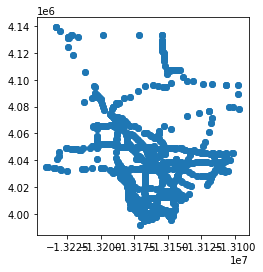

In [136]:
traffic_LA.plot()

In [145]:
traffic_LA.geometry

3940    MULTIPOINT (-13147504.906 3995409.149, -131474...
3941    MULTIPOINT (-13149162.833 3998483.631, -131491...
3942    MULTIPOINT (-13149355.060 3998652.058, -131493...
3943    MULTIPOINT (-13150459.481 3999637.302, -131504...
3944    MULTIPOINT (-13154363.512 4000612.553, -131543...
                              ...                        
4859    MULTIPOINT (-13152981.449 4047668.248, -131529...
4860    MULTIPOINT (-13152980.041 4047718.200, -131529...
4861    MULTIPOINT (-13152980.340 4047766.927, -131529...
4862    MULTIPOINT (-13153027.795 4048909.090, -131530...
6947    MULTIPOINT (-13134293.848 4014899.002, -131342...
Name: geometry, Length: 783, dtype: geometry

**Step 7**: Sort the data from the most car count to the least

In [146]:
traffic_LA_sorted = traffic_LA.sort_values(by='Ahead_AADT',ascending = False)

In [147]:
traffic_LA_sorted[['Route','Ahead_AADT']].head(20)

,Route,Ahead_AADT
4547,110,99000
4548,110,99000
4353,71,97000
4351,71,96000
4514,110,96000
4697,210,95000
4102,5,95000
4202,14,94000
4352,71,93000
4370,90,93000


**Encountered problem**:
The data is sorted incorrectly because they are in strings. The datatype needs to be changed from strings to floats in order to get the correct sorting.

**Step 8**: convert data from string to float

In [158]:
traffic['Ahead_AADT'] = pd.to_numeric(traffic['Ahead_AADT'])
traffic['Back_AADT'] = pd.to_numeric(traffic['Back_AADT'])

In [154]:
traffic.dtypes

OBJECTID_1       int64
OBJECTID         int64
District        object
Route           object
Rte_SFX         object
County          object
PM_PFX          object
Postmile        object
PM_SFX          object
Descriptn       object
Back_pk_h       object
Back_pk_m       object
Back_AADT      float64
Ahead_pk_h      object
Ahead_pk_m      object
Ahead_AADT     float64
Lon_S_or_W      object
Lat_S_or_W      object
Lon_N_or_E      object
Lat_N_or_E      object
geometry      geometry
dtype: object

**Step 9**: resort the data

In [156]:
traffic_sorted[['Route','Ahead_AADT']].head(20)

,Route,Ahead_AADT
6886,5,504000.0
6885,5,465000.0
6872,5,415000.0
7111,405,389400.0
6887,5,382000.0
6881,5,377000.0
6873,5,371000.0
7112,405,370100.0
4717,210,358000.0
4129,10,355000.0


In [159]:
traffic_LA_sorted = traffic_LA.sort_values(by='Ahead_AADT',ascending = False)

In [160]:
traffic_LA_sorted[['Route','Ahead_AADT']].head(20)

,Route,Ahead_AADT
4717,210,358000.0
4129,10,355000.0
4128,10,354000.0
4130,10,350000.0
4335,60,350000.0
4334,60,348000.0
4127,10,347000.0
4719,210,342000.0
4718,210,337000.0
4126,10,336000.0


**Step 10**: plot it. The plot shows locations where have the most car volumes from east of the count location. It shows the locations where most likely will have congestions on the freeways. It seems like intersection of I10 and 110, 210 and conversion on 57 and 60 have the most car volumes averagely in LA county in 2019.

<AxesSubplot:>

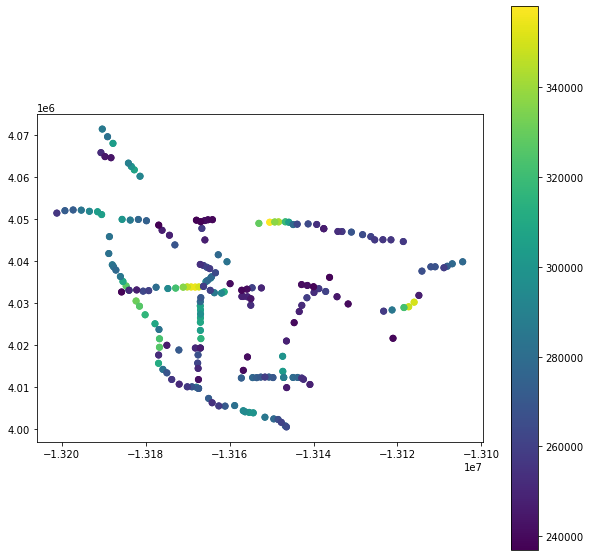

In [163]:
traffic_LA_sorted.head(200).plot(figsize=(10,10),
                          column='Ahead_AADT',legend=True)

**Step 11**: adding a base map to the plot

In [164]:
traffic_LA_web_mercator = traffic_LA.to_crs(epsg=3857)

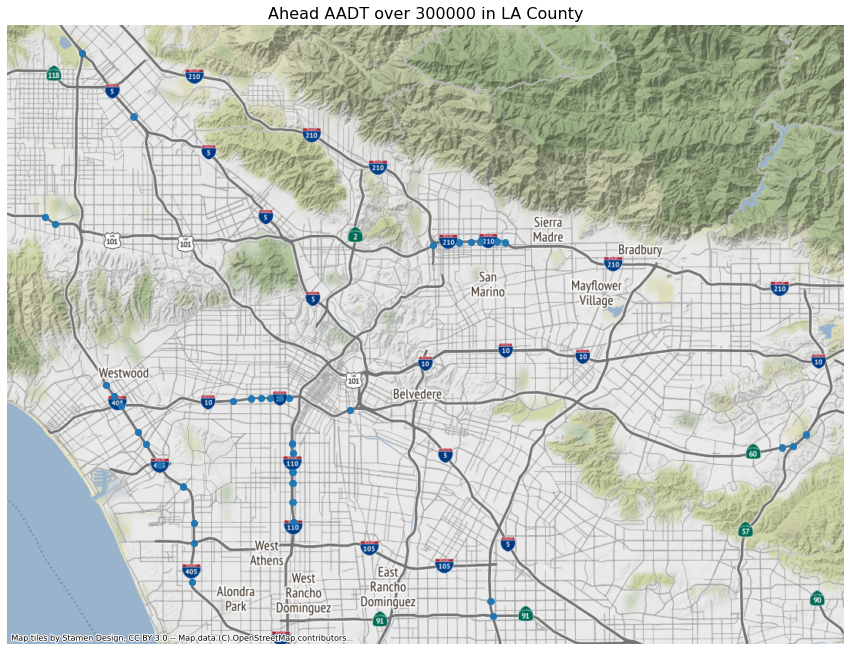

In [170]:
fig, ax = plt.subplots(figsize=(15, 15))

traffic_LA_web_mercator[traffic_LA_web_mercator['Ahead_AADT'] > 300000].plot(ax=ax, alpha=0.8)

ax.axis('off')

ax.set_title('Ahead AADT over 300000 in LA County',fontsize=16)

ctx.add_basemap(ax)

**Thing to explore**: Is it possible to combine the choropleth plot map with the base map so it clearly shows which locations on which freeways have the most annual average daily traffic?